In [24]:
%matplotlib inline

import os
import pandas as pd

from ram import config

import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.run_aggregator import RunAggregator
from ram.analysis.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [49]:
# View all available strategies
print(RunManager.get_run_names('StatArbStrategy'))

         Run  RunDate  Completed  \
0   run_0021      NaN        NaN   
1   run_0022      NaN        NaN   
2   run_0023      NaN        NaN   
3   run_0024      NaN        NaN   
4   run_0026      NaN        NaN   
5   run_0027      NaN        NaN   
6   run_0028      NaN        NaN   
7   run_0029      NaN        NaN   
8   run_0030      NaN        NaN   
9   run_0031      NaN        NaN   
10  run_0032      NaN        NaN   
11  run_0033      NaN        NaN   
12  run_0034      NaN        NaN   
13  run_0035      NaN        NaN   
14  run_0036      NaN        NaN   
15  run_0037      NaN        NaN   
16  run_0038      NaN        NaN   
17  run_0039      NaN        NaN   
18  run_0040      NaN        NaN   
19  run_0042      NaN        NaN   
20  run_0043      NaN        NaN   

                                          Description Starred  
0   First run with new implementation of StrategyB...          
1   quarterly univ creation but with the new strat...          
2   Takes and s

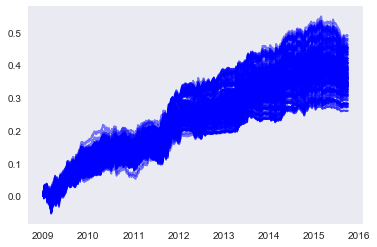

In [83]:
rm1 = RunManager('StatArbStrategy', 'run_0042', 2009)
#rm2 = RunManager('StatArbStrategy', 'run_0028', 2009)

rm1.import_return_frame()
#rm2.import_return_frame()

plt.figure()
plt.plot(rm1.returns.cumsum(), 'b', alpha=.5)
#plt.plot(rm2.returns.cumsum(), 'g', alpha=.5)

plt.grid()
plt.show()

In [84]:
rm1.import_meta()
rm1.meta

{u'description': u'first run with pairs3, constructor1',
 u'git_branch': u'master',
 u'latest_git_commit': u'419cbfa2478c96035481423d8ad266eda67ac6df',
 u'prepped_data_version': u'version_0017'}

In [72]:
#rm1.add_star()

In [80]:
rm1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,avg_holding_days,avg_perc_gain,avg_rebalance_count,max_holding_days,max_perc_gain,max_rebalance_count,min_perc_gain,total_trades
0,max_holding_days,10,96,0.366190,0.082050,6.242380,0.001464,0.041297,10.000000,0.162915,1.536616,-0.175078,1597.467803
1,max_holding_days,30,96,0.360437,0.080969,7.640942,0.001596,0.067047,27.898990,0.166236,2.062500,-0.190059,1376.094697
2,max_pos_prop,0.03,96,0.344128,0.084034,6.668792,0.001462,0.051113,18.966540,0.166108,1.804924,-0.182477,1497.675189
3,max_pos_prop,0.06,96,0.382498,0.078984,7.214531,0.001598,0.057231,18.932449,0.163042,1.794192,-0.182659,1475.887311
4,n_pairs,100,64,0.392243,0.083320,7.119692,0.001598,0.055856,18.767045,0.144554,1.692235,-0.170745,823.766572
5,n_pairs,200,64,0.360245,0.081119,6.910531,0.001513,0.053952,18.994318,0.168264,1.822917,-0.184365,1522.618371
6,n_pairs,300,64,0.337452,0.080089,6.794762,0.001479,0.052707,19.087121,0.180908,1.883523,-0.192595,2113.958807
7,pos_perc_deviation,0.1,192,0.363313,0.081509,6.941661,0.001530,0.054172,18.949495,0.164575,1.799558,-0.182568,1486.781250
8,remove_earnings,False,96,0.369058,0.080095,7.434427,0.001667,0.065889,19.195707,0.177284,1.884154,-0.188726,1414.853220
9,remove_earnings,True,96,0.357568,0.082923,6.448895,0.001393,0.042454,18.703283,0.151866,1.714962,-0.176410,1558.709280


In [40]:
comb = CombinationSearch()
comb.add_run(rm1)
comb.start(10, criteria='mean')



  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 57.39it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Reading and aggregating runs...
Finished aggregating runs...





 10%|█         | 1/10 [00:06<01:00,  6.67s/it]

 20%|██        | 2/10 [00:13<00:52,  6.58s/it]

 30%|███       | 3/10 [00:19<00:44,  6.41s/it]

 40%|████      | 4/10 [00:25<00:37,  6.30s/it]

 50%|█████     | 5/10 [00:30<00:30,  6.12s/it]

 60%|██████    | 6/10 [00:36<00:23,  6.00s/it]

 70%|███████   | 7/10 [00:42<00:17,  5.89s/it]

 80%|████████  | 8/10 [00:47<00:11,  5.74s/it]

 90%|█████████ | 9/10 [00:52<00:05,  5.59s/it]

100%|██████████| 10/10 [00:58<00:00,  5.69s/it]



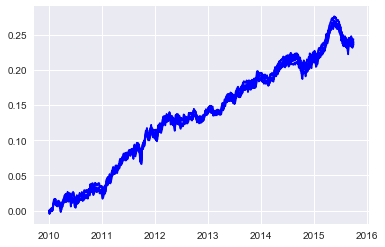

In [41]:
x2 = comb.best_results_rets.dropna()
plt.figure()
plt.plot(x2.cumsum(), 'b')
plt.show()


In [43]:
df = rollup_returns(x2)
df['year'] = df.sum(axis=1)
df

Qtr,1,2,3,4,year
Year,,,,,
2010,0.011603,0.001564,0.015403,0.005988,0.034558
2011,0.024008,0.023623,-0.010133,0.036138,0.073637
2012,0.023419,-0.001318,0.011379,0.001844,0.035324
2013,-0.000535,0.018823,0.022220,0.010817,0.051326
2014,0.001033,0.023174,-0.005925,0.012247,0.030528
2015,0.026080,0.010877,-0.018611,NaN,0.018346


In [17]:
# ~~~~~~ RunAggregator ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ra = RunAggregator()

# ra.add_run(rm1)
ra.add_run(rm1)
ra.add_run(rm3)

returns = ra.aggregate_returns()

In [24]:
returns.iloc[700:].mean() * 252

StatArbStrategy_run_0028_0      0.029027
StatArbStrategy_run_0028_1      0.030036
StatArbStrategy_run_0028_2      0.027379
StatArbStrategy_run_0028_3      0.030215
StatArbStrategy_run_0028_4      0.026101
StatArbStrategy_run_0028_5      0.027883
StatArbStrategy_run_0028_6      0.028664
StatArbStrategy_run_0028_7      0.029015
StatArbStrategy_run_0028_8      0.029033
StatArbStrategy_run_0028_9      0.033658
StatArbStrategy_run_0028_10     0.029184
StatArbStrategy_run_0028_11     0.032883
StatArbStrategy_run_0028_12     0.027350
StatArbStrategy_run_0028_13     0.033926
StatArbStrategy_run_0028_14     0.028921
StatArbStrategy_run_0028_15     0.034886
StatArbStrategy_run_0028_16     0.029530
StatArbStrategy_run_0028_17     0.035710
StatArbStrategy_run_0028_18     0.029372
StatArbStrategy_run_0028_19     0.035463
StatArbStrategy_run_0028_20     0.028476
StatArbStrategy_run_0028_21     0.034875
StatArbStrategy_run_0028_22     0.029201
StatArbStrategy_run_0028_23     0.034815
StatArbStrategy_

In [42]:
df = pd.DataFrame({'Rets': rm3.returns['26']}).reset_index()
df.columns = ['Date', 'Rets']

In [43]:
df['TIndex'] = ['{}{}'.format(x.year, (x.month-1)/3+1) for x in df.Date]
df['Year'] = [x.year for x in df.Date]

In [44]:
df.groupby('Year')['Rets'].sum()

Year
2009    0.114857
2010    0.016594
2011    0.060064
2012    0.040255
2013    0.037326
2014    0.021170
2015    0.040347
2016    0.021810
2017    0.017267
Name: Rets, dtype: float64

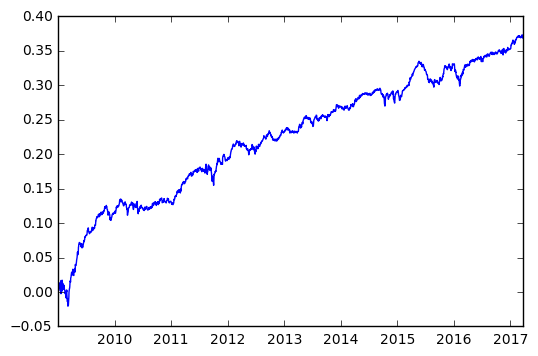

In [47]:
df2 = df.set_index('Date')

plt.figure()
plt.plot(df2.Rets.cumsum())